# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv("/content/CA-Housing.csv")

# Explore the Data

In [4]:
print(df.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [5]:
rows = df.shape[0]
columns = df.shape[1]

print(f"There's {rows} rows in this dataset")
print(f"There's {columns} columns in this dataset")


There's 20640 rows in this dataset
There's 10 columns in this dataset


In [6]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Find Missing Values

In [8]:
missing_count = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_count)
print(missing_pct)
# print(f"There's a total of {missing_count} missing values in the dataset, which is {missing_pct}%")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64


# Handle Missing Values

In [9]:
if df["total_bedrooms"].isnull().sum() > 0:
  median_total_bedrooms = df["total_bedrooms"].median()
  df["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)


print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


# Categorical Encoding

In [10]:
ocean_views = df["ocean_proximity"].value_counts()

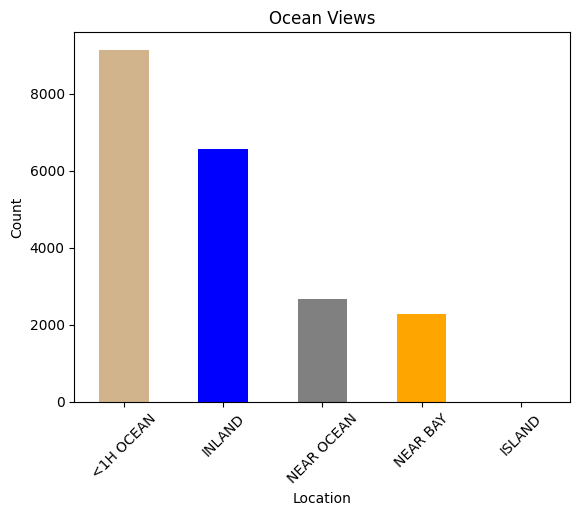

In [11]:
colors = ["tan", "blue", "grey", "orange"]
ocean_views.plot(kind='bar', title="Ocean Views", color=colors)
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [12]:
df["ocean_proximity"]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [13]:
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[["ocean_proximity"]])

encoded_cols = pd.DataFrame(
    encoded_array,
    columns = encoder.get_feature_names_out(["ocean_proximity"])
)

df_analysis = pd.concat([df.drop("ocean_proximity", axis=1), encoded_cols], axis=1)

print(df_analysis)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

# Create a Correlation Matrix for Analysis

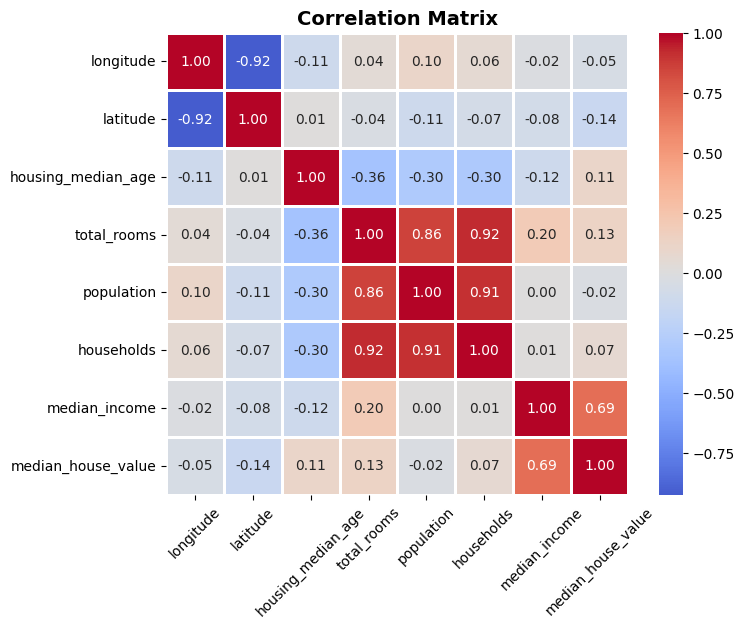

In [14]:
all_columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "population", "households", "median_income", "median_house_value"]
correlation_matrix = df[all_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

# Define the Target and Feature Variables

In [15]:
X = df_analysis.drop("median_house_value", axis=1)
y = df["median_house_value"]


# Split the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X.shape)

(20640, 13)


In [18]:
print(y.shape)

(20640,)


# Train the Model

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Run Predictions

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
print(y_train_pred)

[188628.07724361 290379.8948687  250985.48476349 ... 194624.05524513
 281818.52422052 271572.8418584 ]


In [22]:
print(y_test_pred)

[ 54055.44889898 124225.33893718 255489.37949166 ... 439180.98341182
 120797.55240621 183386.04993584]


# Plot Actual vs Predicted

Text(0.5, 1.0, 'Actual vs Predicted Median House Price')

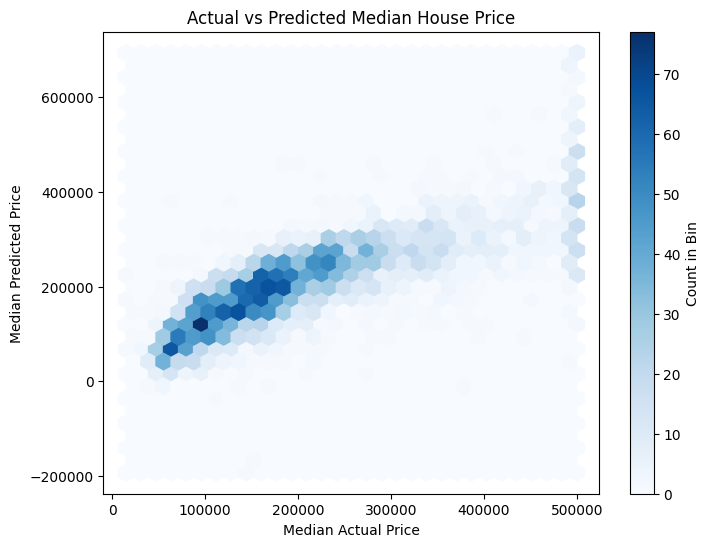

In [26]:
plt.figure(figsize=(8,6))
plt.hexbin(y_test, y_test_pred, gridsize=30, cmap='Blues')
plt.colorbar(label="Count in Bin")
plt.xlabel("Median Actual Price")
plt.ylabel("Median Predicted Price")
plt.title("Actual vs Predicted Median House Price")


# Evaluate the Model

In [27]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance")
print("="*70)
print(f"\nTraining Set:")
print(f" RMSE: {train_rmse:.4f}")
print(f" R2 Score: {train_r2:.4f}")


print(f"\nTesting Set:")
print(f" RMSE: {test_rmse:.4f}")
print(f" R2 Score: {test_r2:.4f}")

if test_r2 > 0.85:
  print("\nModel performance exceeds expected R2 > 0.85!")
else:
  print("\nModel performance below expected R2 > 0.85")

Model Performance

Training Set:
 RMSE: 68433.9374
 R2 Score: 0.6497

Testing Set:
 RMSE: 70060.5218
 R2 Score: 0.6254

Model performance below expected R2 > 0.85
